# Integración numérica de ODEs

En este práctico introduciremos los métodos de **Euler** y de **RK4** (Runge-Kutta de orden 4) de integración numérica de Ecuaciones Diferenciales Ordinarias (ODEs).

## **Ejercicio 1)** Importando librerías

Importe las librerías `numpy` para operar con arrays, `scipy` para utilizar rutinas de algebra lineal y `matplotlib.pyplot` para graficar.

In [1]:
import numpy as np
import scipy as sp
import scipy.linalg as linalg
import matplotlib.pyplot as plt

## **Ejercicio 2)** Integrador de **Euler**

### Ecuaciones Diferenciales Ordinarias (ODEs)

El comportamiento de un sistema dinámico se suele describir en términos de trayectorias. Una trayectoria es una función del tiempo

\begin{eqnarray}
x:\mathbb{R}\ni t\to x(t)\in X
\end{eqnarray}

en donde $x(t)\in X$ representa el estado que exhibe el sistema al tiempo $t$ y $X$ es un espacio vectorial.
Típicamente, $X=\mathbb{R}^n$.

Las trayectorias de un sistema dinámico suelen ser soluciones de una ecuación diferencial.
Nosotros, nos enfocaremos en sistemas dinámicos caracterizados por Ecuaciones Diferenciales Ordinarias (ODEs).

Decimos que una trayectoria $x:t\to x(t)$ es su solución de una ODE caracterizada por una función

\begin{eqnarray}
f: X,\mathbb{R} \ni x,t \to f(x,t) \in X
\end{eqnarray}

cuando

\begin{eqnarray}
x'(t) = f(x(t),t)
\end{eqnarray}

para todo tiempo $t$ perteneciente a algún intervalo de tiempo $ T\subseteq \mathbb{R}$. Aquí, $x'(t)$ es la derivada con respecto al tiempo $t$ de la función $x:t\to x(t)$ que representa la trayectoria.

En una ODE, una trayectoria particular $x$ queda unívocamente determinada por el valor de $x(t)$ en algún tiempo específico. Típicamente, se considera una *condición incial* $x(a)$, y nos interesa computar el valor de $x(t)$ para todo $t\in [a,b]$, i.e. conocer la trayectoria para todo tiempo entre un tiempo incial $a$ y un tiempo final $b$.

### Métodos de integración numérica de ODEs

Los métodos de integración de sistemas de Ecuaciones Diferenciales Ordinarias (ODEs) consisten, básicamente, de dos partes.

* Un método de extrapolación que permita aproximar **un paso de integración**, i.e. aproximar $x(t+h)$ a partir de conocer $t$, $x(t)$ y $f$ para valores de $h\in \mathbb{R}$ suficientementes pequeños.

* Un **integrador** de sucesivas aproximaciones $w_0$, $w_1$, ..., $w_k$ de los valores $x(a)$, $x(a+h)$, $x(a+2h)$, ..., $x(a+kh)=x(b)$ computadas secuencialmente a partir de un valor incial $w_0=x(a)$.

Existen varios métodos de aproximar un paso de integración.
En cambio, el integrador suele ser común a los diferentes métodos.

### Método de Euler

El método de Euler es, quizás, el más simple que existe.
Esencialmente, consiste en aproximar de $x(t+h)$ utilizando $f(x,t)$ para calcular la extrapolación lineal

\begin{eqnarray}
x(t+h)
&=&
x(t) + x'(t)h + x''(t)\frac{h^2}{2} + ...
\\
&\approx &
x(t) + x'(t)h
\\
&=&
x(t) + f(x(t),t)h
\end{eqnarray}

para un valor de $h$ que sea relativamente pequeño.

### Integrador

Si $t_0,t_1,...,t_n$ son valores equiespaciados en el intervalo de tiempo $[a,b]$, entonces $t_j=a+jh$ para $j\in \{0,1,2,...,n\}$ con $t_n=b$ y $h=(b-a)/n$.
Luego, utilizando el método $m$ proveido por el usuario, se computan sucesivamente las aproximaciones

\begin{eqnarray}
w_{j} &=& m(f,w_{j-1},t_{j-1},h)
\end{eqnarray}

de los valores $x(t+ih)$ para $j=1,...,n$, partiendo de la condición inicial $w_0=x(t_0)=x(a)$.

Por ejemplo, si el método proveido es el de Euler, las aproximaciones adoptan la forma

\begin{eqnarray}
w_{j} &=& w_{j-1} + f(w_{j-1},t_{j-1})h
\end{eqnarray}

**1)** Implemente una función de Python llamada `euler` que compute un paso de integración según el método de **Euler**.
Dicha función debe tomar como argumentos:

* La función $f:\mathbb{R}^n,\mathbb{R} \to \mathbb{R}^n$ que caracterize el lado derecho de la ODE.

* Un valor de $x \in \mathbb{R}^n$.

* Un valor de $t \in \mathbb{R}$.

* El paso de integración $h \in \mathbb{R}$.

* Un vector de parámetros $p \in \mathbb{R}^m$.

La función  `euler` debe retornar el lado derecho de la aproximación $x(t+h)\approx x(t) + f(x(t),t)h$.

**2)** Implemente una función de Python llamada `integrador_ode` que integre el cómputo de sucesivos pasos de integración.
Dicha función debe tomar como argumentos:

* Una función `m` que aproxime el paso de integración (ej. `euler`).

* La función $f:\mathbb{R}^n,\mathbb{R} \to \mathbb{R}^n$.

* La condición inicial $x_0=x(a)\in \mathbb{R}^n$.

* El tiempo inciial $a\in \mathbb{R}$.

* El tiempo final $b\in \mathbb{R}$.

* El número $k\in \mathbb{N}$ de pasos de integración.

* Un vector de parámetros $p \in \mathbb{R}^m$.

* Y, opcionalmente, una *función condicionante*
\begin{eqnarray}
c:\mathbb{R}^n,\mathbb{R},\mathbb{R}^m\ni x(t),t,p \to c(x(t),t,p)\in \mathbb{R}^n
\end{eqnarray}
que permita intervenir en el cómputo de la trayectoria cuando se desee.
Veremos más adelante para que sirve esta función condicionante.

In [2]:
# 2.1)
def euler(f, x, t, h, p):
    """
    Realiza un paso de integración utilizando el método de Euler.

    Args:
        f: Función que caracteriza el lado derecho de la ODE. Debe tomar los argumentos (x, t, p) y devolver un vector.
        x: Valor inicial.
        t: Tiempo actual.
        h: Paso de integración.
        p: Vector de parámetros.

    Returns:
        Nuevo valor de x después de un paso de integración.
    """
    # Calcula el incremento utilizando la función f en el punto actual
    increment = f(x, t, p) * h
    
    # Calcula el nuevo valor de x después del paso de integración
    new_x = x + increment
          
    return new_x


In [3]:
def integrador_ode(m, f, x0, a, b, k, p, c=None):
    """
    Integra una ODE utilizando el método dado para computar sucesivos pasos de integración.

    Args:
        m: Función que aproxima el paso de integración.
        f: Función que caracteriza el lado derecho de la ODE. Debe tomar los argumentos (x, t, p) y devolver un vector.
        x0: Condición inicial.
        a: Tiempo inicial.
        b: Tiempo final.
        k: Número de pasos de integración.
        p: Vector de parámetros.
        c: Función condicionante opcional que permite intervenir en el cómputo de la trayectoria.

    Returns:
        Lista de valores de x en cada paso de integración.
    """
    x_values = [x0]
    t = a
    h = (b - a) / k
    time_values = np.arange(a, b + h, h)

    for _ in range(k):
        if c is None or c(x_values[-1], t, p):
            x_new = m(f, x_values[-1], t, h, p)
            x_values.append(x_new)        
        t += h

    return time_values, np.array(x_values)

In [3]:
'''
def integrador_ode(m, f, x0, a, b, k, p, c=None):
    """
    Integra una ODE utilizando el método dado para computar sucesivos pasos de integración.

    Args:
        m: Función que aproxima el paso de integración.
        f: Función que caracteriza el lado derecho de la ODE. Debe tomar los argumentos (x, t, p) y devolver un vector.
        x0: Condición inicial.
        a: Tiempo inicial.
        b: Tiempo final.
        k: Número de pasos de integración.
        p: Vector de parámetros.
        c: Función condicionante opcional que permite intervenir en el cómputo de la trayectoria.

    Returns:
        Lista de valores de x en cada paso de integración.
    """
    x_values = [x0]
    t = a
    h = (b - a) / k

    for _ in range(k):
        if c is None or c(x_values[-1], t, p):
            x_new = m(f, x_values[-1], t, h, p)
            x_values.append(x_new)        
        t += h

    return x_values
'''


### Prueba de concepto

In [4]:
def f(x, t, p):
    # Define la función f para la ODE
    return x + t + p

def condition(x, t, p):
    # Define la función condicionante si es necesario
    return None

initial_x = 1.0
start_time = 0.0
end_time = 1.0
num_steps = 10
parameters = [2.0]

t, x = integrador_ode(euler, f, initial_x, start_time, end_time, num_steps, parameters, c=condition)
print("Resultados de la integración:", x)

Resultados de la integración: [1.]


## **Ejercicio 3)** Crecimiento exponencial

Considere la ODE

\begin{eqnarray}
x'(t)
&=&
qx(t)
\end{eqnarray}

donde $q$ es una constante positiva.

**1)** Utilice el integrador ODE implementado en el ejercicio 2) para integrar la ODE arriba definida, a partir de la condición inicial $x(t=0)=1$ hasta el tiempo $t=3$, y para $q=1$. Utilice el paso de integración $h=0.1$.

**2)** Grafique la solución numérica computada en el inciso anterior. Incluya en el gráfico la solución exacta que se deriva a continuación

\begin{eqnarray}
x'(t)
&=&
qx(t)
\\
\frac{dx}{dt}
&=&
qx
\\
\frac{dx}{x}
&=&
qdt
\\
\int_{x(0)}^{x(\tau)}
\frac{dx}{x}
&=&
q
\int_0^{\tau} dt
\\
\ln(x(\tau))-\ln(x(0))
&=&
q\tau
\\
\ln(x(t))
&=&
qt
+
\ln(x(0))
\\
x(t)
&=&
e^{
qt
+
\ln(x(0))
}
\\
x(t)
&=&
e^{\ln(x(0))}
e^{qt}
\\
x(t)
&=&
x(0)
e^{qt}
\end{eqnarray}

**3)** Repita para $h=0.01$.

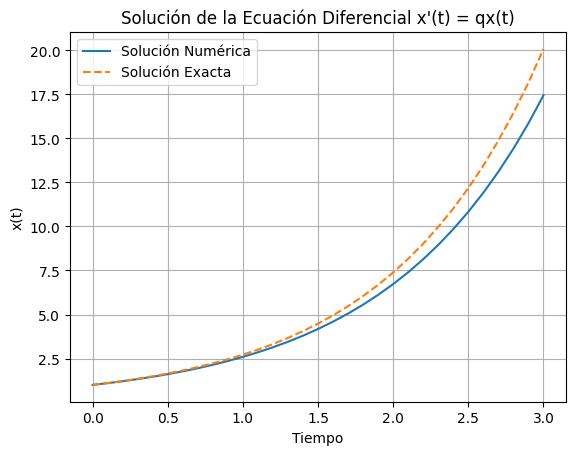

In [5]:
#3.1) h = 0.1

#Función que caracteriza el lado derecho de la ecuación
def f(x, t, p):
    return p[0] * x
    #return sum([p_i * x for p_i in p]) #En caso que la función sea una f'(x) = p1*x + p2*x + ...
    
#Solución exacta
def exact_solution(t, x0, q):
    return x0 * np.exp(q * t)

# Definición de parámetros
h = 0.1
initial_x = 1.0
start_time = 0.0
end_time = 3.0
num_steps = int((end_time - start_time) / h)
q = 1.0
parameters = [q]

# Solución numérica utilizando el integrador_ode
time_values, numerical_solution = integrador_ode(euler, f, initial_x, start_time, end_time, num_steps, parameters)

# Solución exacta
exact_values = [exact_solution(t, initial_x, q) for t in time_values]

# Gráfico de la solución numérica y exacta
plt.plot(time_values, numerical_solution, label='Solución Numérica')
plt.plot(time_values, exact_values, label='Solución Exacta', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Solución de la Ecuación Diferencial x\'(t) = qx(t)')
plt.legend()
plt.grid()
plt.show()

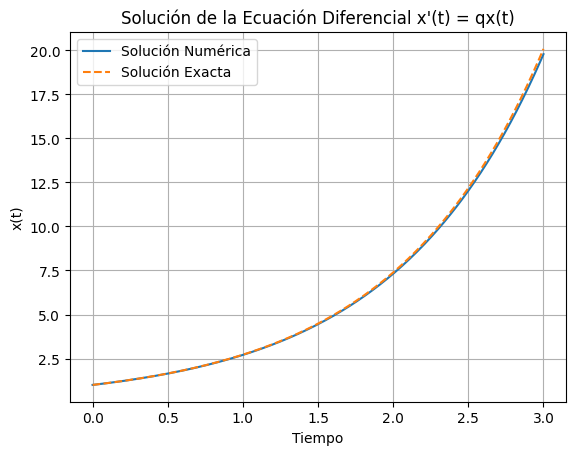

In [6]:
#3.1) h = 0.01

#Función que caracteriza el lado derecho de la ecuación
def f(x, t, p):
    return p[0] * x
    #return sum([p_i * x for p_i in p]) #En caso que la función sea una f'(x) = p1*x + p2*x + ...

#Solución exacta
def exact_solution(t, x0, q):
    return x0 * np.exp(q * t)

# Definición de parámetros
q = 1.0
h = 0.01
initial_x = 1.0
start_time = 0.0
end_time = 3.0
num_steps = int((end_time - start_time) / h)
parameters = [q]

# Solución numérica utilizando el integrador_ode
time_values, numerical_solution = integrador_ode(euler, f, initial_x, start_time, end_time, num_steps, parameters)

# Solución exacta
exact_values = [exact_solution(t, initial_x, q) for t in time_values]

# Gráfico de la solución numérica y exacta
plt.plot(time_values, numerical_solution, label='Solución Numérica')
plt.plot(time_values, exact_values, label='Solución Exacta', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Solución de la Ecuación Diferencial x\'(t) = qx(t)')
plt.legend()
plt.grid()
plt.show()

## **Ejercicio 4)** Decaimiento exponencial

Considere la ODE

\begin{eqnarray}
x'(t)
&=&
-qx(t)+r
\end{eqnarray}

donde $q$ es una constante positiva y $r$ es una constante arbitraria.

**1)** Use el integrador ODE con el método de Euler para encontrar una aproximación numérica de la ODE arriba especificada.
Considere la condición inicial $x(0)=3$ e integre hasta $t=3$.
Utilice el paso de integración $h=0.1$ y los valores de los parámetros $q=2$ y $r=3$.

**2)** Grafique la trayectoria computada en el inciso anterior y, con el fin de comparar, grafique simultaneamente la correspondiente solución analítica derivada a continuación

\begin{eqnarray}
\frac{dx}{dt}
&=&
-qx+r
\\
-\frac{1}{q}\frac{du}{dt}
&=&
u,
\;\;\;\;
\;\;\;\;
\;\;\;\;
u=-qx+r
\\
\frac{du}{dt}
&=&
-qu
\\
u(t)
&=&
u(0)e^{-qt}
\\
-qx(t)+r
&=&
(-qx(0)+r)e^{-qt}
\\
x(t)
&=&
(x(0)-r/q)e^{-qt}+r/q
\end{eqnarray}

**3)** Repita para $h=0.01$.

**4)** Repita para $x(0)=1$.

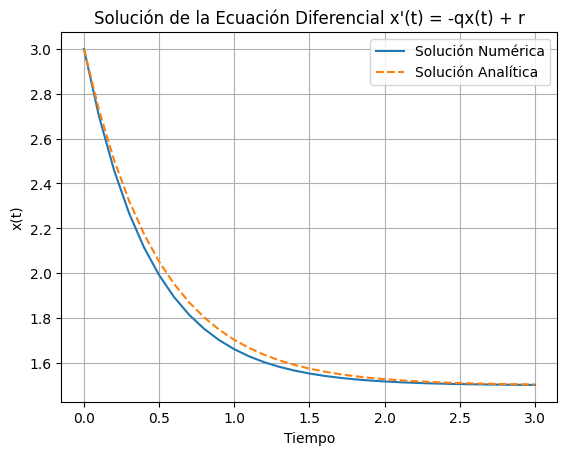

In [7]:
#h = 0.1

def f(x, t, p):
    return -p[0] * x + p[1]

def exact_solution(t, x0, q, r):
    return (x0 - r / q) * np.exp(-q * t) + r / q

# Definición de parámetros
h = 0.1
initial_x = 3.0
start_time = 0.0
end_time = 3.0
q = 2.0
r = 3.0
parameters = [q, r]
num_steps = int((end_time - start_time) / h)

# Solución numérica utilizando el método de Euler
time_values, numerical_solution = integrador_ode(euler, f, initial_x, start_time, end_time, num_steps, parameters)

# Solución analítica
analytical_values = [exact_solution(t, initial_x, q, r) for t in time_values]

# Gráfico de la solución numérica y analítica
plt.plot(time_values, numerical_solution, label='Solución Numérica')
plt.plot(time_values, analytical_values, label='Solución Analítica', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Solución de la Ecuación Diferencial x\'(t) = -qx(t) + r')
plt.legend()
plt.grid()
plt.show()

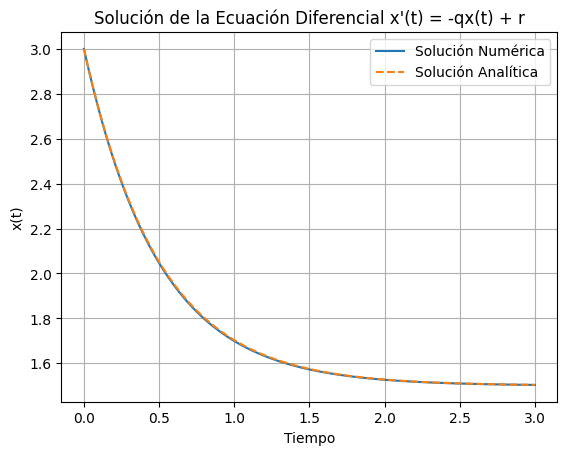

In [8]:
#h = 0.01

def f(x, t, p):
    return -p[0] * x + p[1]

def exact_solution(t, x0, q, r):
    return (x0 - r / q) * np.exp(-q * t) + r / q

# Definición de parámetros
h = 0.01
initial_x = 3.0
start_time = 0.0
end_time = 3.0
q = 2.0
r = 3.0
parameters = [q, r]
num_steps = int((end_time - start_time) / h)

# Solución numérica utilizando el método de Euler
time_values, numerical_solution = integrador_ode(euler, f, initial_x, start_time, end_time, num_steps, parameters)

# Solución analítica
analytical_values = [exact_solution(t, initial_x, q, r) for t in time_values]

# Gráfico de la solución numérica y analítica
plt.plot(time_values, numerical_solution, label='Solución Numérica')
plt.plot(time_values, analytical_values, label='Solución Analítica', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Solución de la Ecuación Diferencial x\'(t) = -qx(t) + r')
plt.legend()
plt.grid()
plt.show()

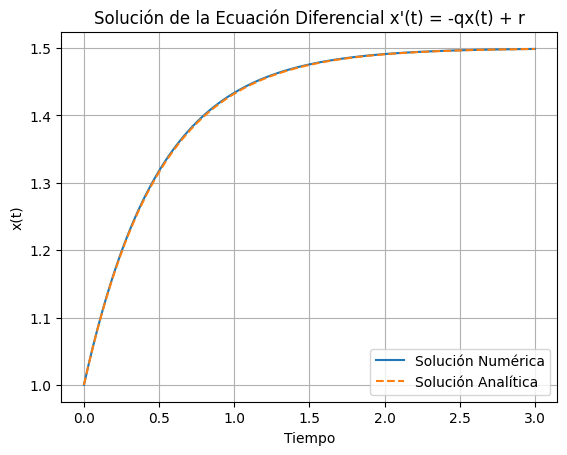

In [9]:
#h = 0.01
#x0 = 1

def f(x, t, p):
    return -p[0] * x + p[1]

def exact_solution(t, x0, q, r):
    return (x0 - r / q) * np.exp(-q * t) + r / q

# Definición de parámetros
h = 0.01
initial_x = 1.0
start_time = 0.0
end_time = 3.0
q = 2.0
r = 3.0
parameters = [q, r]
num_steps = int((end_time - start_time) / h)

# Solución numérica utilizando el método de Euler
time_values, numerical_solution = integrador_ode(euler, f, initial_x, start_time, end_time, num_steps, parameters)

# Solución analítica
analytical_values = [exact_solution(t, initial_x, q, r) for t in time_values]

# Gráfico de la solución numérica y analítica
plt.plot(time_values, numerical_solution, label='Solución Numérica')
plt.plot(time_values, analytical_values, label='Solución Analítica', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title('Solución de la Ecuación Diferencial x\'(t) = -qx(t) + r')
plt.legend()
plt.grid()
plt.show()

## **Ejercicio 5)** Ecuación Logística

Considere la ODE

\begin{eqnarray}
x'(t)
&=&
rx(t)(1-x/K)
\end{eqnarray}

**1)** Integre numéricamente la anterior ODE utilizando el método de Euler, la condición inicial $x(0)=0.1$, hasta $t=5$, utilizando un paso de integración $h=0.1$, una tasa de reproducción $r=1$ y una capacidad de carga $K=1$.

**2)** Grafique la solución computada en el inciso anterior, comparandola con la solución analítica que se deriva a continuación

\begin{eqnarray}
\frac{dx}{dt}
&=&
rx(1-x/K)
\\
\frac{dx}{x(1-x/K)}
&=&
rdt
\\
\int_{x(0)}^{x(t)}\frac{dx}{x(1-x/K)}
&=&
rt
\\
\int_{x(0)}^{x(t)}dx\,\frac{1}{x}+\frac{1}{K-x}
&=&
rt
\\
\ln(x(t))-\ln(x(0))
-
\ln(K-x(t))
+
\ln(K-x(0))
&=&
rt
\\
\ln\frac{x(t)}{K-x(t)}
&=&
rt
+
\ln\frac{x(0)}{K-x(0)}
\\
\frac{x(t)}{K-x(t)}
&=&
f(t)
=
\frac{x(0)}{K-x(0)}e^{rt}
\\
x(t)
&=&
(K-x(t))f(t)
\\
x(t)(1+f(t))
&=&
Kf(t)
\\
x(t)
&=&
K\frac{f(t)}{1+f(t)}
=
K\frac{1}{1+\frac{1}{f(t)}}
\\
x(t)
&=&
K\left(1+\frac{K-x(0)}{x(0)}e^{-rt}\right)^{-1}
\end{eqnarray}

**3)** Repita para $x(0)=1.5$.

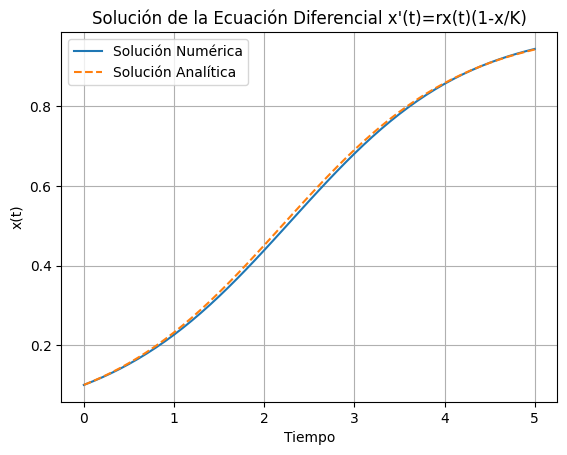

In [10]:
# 5.1)
def f(x, t, p):
    return p[0] * x * (1 - x / p[1])

def exact_solution(t, x0, K, r):
    return K * x0 / (x0 + (K - x0) * np.exp(-r * t))

# Definición de parámetros
r = 1.0
h = 0.1
K = 1.0
initial_x = 0.1
start_time = 0.0
end_time = 5.0
parameters = [r, K]
num_steps = int((end_time - start_time) / h)

# Solución numérica utilizando el método de Euler
time_values, numerical_solution = integrador_ode(euler, f, initial_x, start_time, end_time, num_steps, parameters)

# Solución analítica
analytical_values = [exact_solution(t, initial_x, K, r) for t in time_values]

# Gráfico de la solución numérica y analítica
plt.plot(time_values, numerical_solution, label='Solución Numérica')
plt.plot(time_values, analytical_values, label='Solución Analítica', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title("Solución de la Ecuación Diferencial x'(t)=rx(t)(1-x/K)")
plt.legend()
plt.grid()
plt.show()

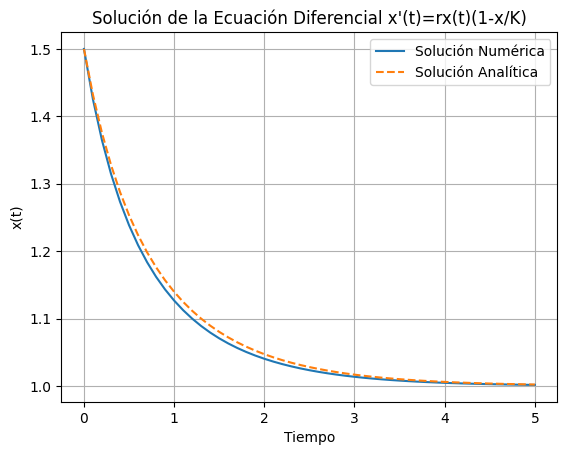

In [11]:
# 5.3)
def f(x, t, p):
    return p[0] * x * (1 - x / p[1])

def exact_solution(t, x0, K, r):
    return K * x0 / (x0 + (K - x0) * np.exp(-r * t))

# Definición de parámetros
r = 1.0
h = 0.1
K = 1.0
initial_x = 1.5
start_time = 0.0
end_time = 5.0
parameters = [r, K]
num_steps = int((end_time - start_time) / h)

# Solución numérica utilizando el método de Euler
time_values, numerical_solution = integrador_ode(euler, f, initial_x, start_time, end_time, num_steps, parameters)

# Solución analítica
analytical_values = [exact_solution(t, initial_x, K, r) for t in time_values]

# Gráfico de la solución numérica y analítica
plt.plot(time_values, numerical_solution, label='Solución Numérica')
plt.plot(time_values, analytical_values, label='Solución Analítica', linestyle='dashed')
plt.xlabel('Tiempo')
plt.ylabel('x(t)')
plt.title("Solución de la Ecuación Diferencial x'(t)=rx(t)(1-x/K)")
plt.legend()
plt.grid()
plt.show()

## **Ejercicio 6)** Oscilador armónico

### Redución del orden de una ODE

En general, una ODE tiene la siguiente forma

\begin{eqnarray}
y^{(n)}(t)
&=&
f(y(t),y'(t),y''(t),...,y^{(n-1)}(t),t)
\;\;\;\; (1)
\end{eqnarray}

donde $y^{(i)}$ denota la $i$-ésima derivada de $y$ respecto a $t$.
Dicha ODE es de dimensión $d$ si $x:\mathbb{R}\ni t\to y(t)\in \mathbb{R}^d$.
Además, se dice que es de orden $n$ porque involucra derivadas de $x$ de hasta orden $n$.

Una ODE de orden $n$ y dimensión $d$ como la de la ecuación $(1)$ siempre puede reducirse a una ODE de primero orden y dimensión $nd$ utilizando la siguiente transformación

\begin{eqnarray}
x_1:t\to x_1(t) &:=& y(t) \\
x_2:t\to x_2(t) &:=& y'(t) = x_1'(t) \\
x_3:t\to x_3(t) &:=& y''(t) = x_2'(t) \\
&...& \\
x_n:t\to x_n(t) &:=& y^{(n-1)}(t) = x_{n-1}'(t) \\
x_n':t\to x_n'(t) &=& y^{(n)}(t)
\end{eqnarray}

que vale para todo $t\in [a,b]$ de manera que la ecuación $(1)$ adopte la forma

\begin{eqnarray}
x_{1}'(t) &=& x_2(t) \\
x_{2}'(t) &=& x_3(t) \\
&...& \\
x_{n-1}'(t) &=& x_n(t) \\
x_n'(t) &=& f(x_1(t),x_2(t),x_3(t),...,x_{n}(t),t)
\end{eqnarray}

### El oscilador armónico

El oscilador armónico viene descripto por la siguiente ecuación diferencial ordinaria (ODE)

\begin{eqnarray}
y''(t) &=& -\alpha y(t)
\end{eqnarray}

Esta es una ODE de segundo orden, ya que aparece la derivada segunda de la función $x:t\to x(t)$.
La convertimos a una de primer orden definiendo $x_1=y$ y $x_2=y'$, obteniéndose

\begin{eqnarray}
x_1'(t) &=& x_2(t) \\
x_2'(t) &=& -\alpha x_1(t)
\end{eqnarray}

**1)** Utilice lo implementado en el ejecicio 2) para resolver en el intervalo de tiempo $[a,b]=[0,10]$ la ODE del oscilador armónico sujeto a las siguientes condiciones iniciales

\begin{eqnarray}
x_1(a) &=& y(a) = 1 \\
x_2(a) &=& y'(a) = 0
\end{eqnarray}

para $\alpha=3$ y usando un paso de integración $h=0.1$.

**2)** Grafique $x_1(t)$ vs $t$ y $x_2(t)$ vs $t$. No olvide agregar leyendas a los ejes y las curvas.
Use `np.scatter()` en vez de `np.plot()` para graficar usando puntos en vez de curvas.

**3)** Grafique $x_2(t)$ vs $x_1(t)$ paramétricamente en función de $t$.

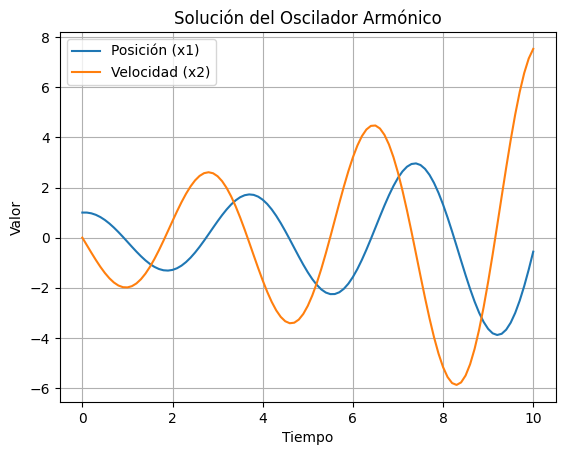

In [15]:
# 6.1)
def f(x, t, alpha):
    return np.array([x[1], -alpha * x[0]])

# Definición de parámetros
alpha = 3.0
initial_x = [1.0, 0.0]  # Condiciones iniciales: x(a) = 1, x'(a) = 0
start_time = 0.0
end_time = 10.0
h = 0.1 
num_steps = int((end_time - start_time) / h)

# Solución numérica utilizando el método de Euler
time_values, numerical_solution = integrador_ode(euler, f, initial_x, start_time, end_time, num_steps, alpha)

# Gráfico de la solución del oscilador armónico
plt.plot(time_values, numerical_solution[:,0], label='Posición (x1)')
plt.plot(time_values, numerical_solution[:,1], label='Velocidad (x2)')
plt.xlabel('Tiempo')
plt.ylabel('Valor')
plt.title('Solución del Oscilador Armónico')
plt.legend()
plt.grid()
plt.show()

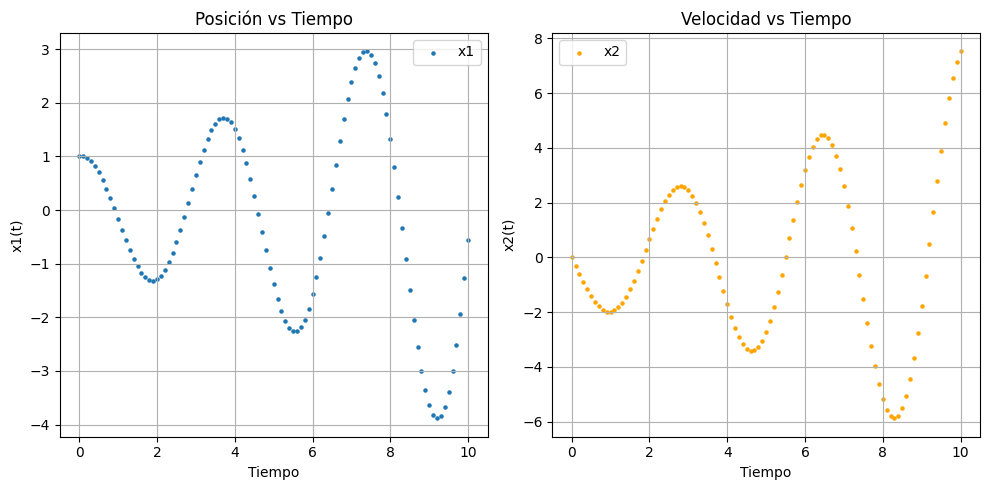

In [16]:
plt.figure(figsize=(10, 5))

# Gráfico de x1 vs t
plt.subplot(1, 2, 1)
plt.scatter(time_values, numerical_solution[:,0], label='x1', s=5.0)
plt.xlabel('Tiempo')
plt.ylabel('x1(t)')
plt.title('Posición vs Tiempo')
plt.legend()
plt.grid()

# Gráfico de x2 vs t
plt.subplot(1, 2, 2)
plt.scatter(time_values, numerical_solution[:,1], label='x2', color='orange', s=5.0)
plt.xlabel('Tiempo')
plt.ylabel('x2(t)')
plt.title('Velocidad vs Tiempo')
plt.legend()

plt.tight_layout()
plt.grid()
plt.show()

Es importante notar que siempre que la posición es máxima (ya sea negativa o positiva), la velocidad es 0, debido a que el oscilador (por ejemplo, un péndulo) se detiene en su posición máxima. A su vez, cuando la posición es 0, las velocidades son picos, ya que la máxima velocidad en un oscilador se da en su punto medio de recorrido.

Por otro lado, dado el alto valor de h, la amplitud de las oscilaciones va en aumento. Esto se debe al bajo rendimiento del integrador de Euler para aproximar la ecuación diferencial

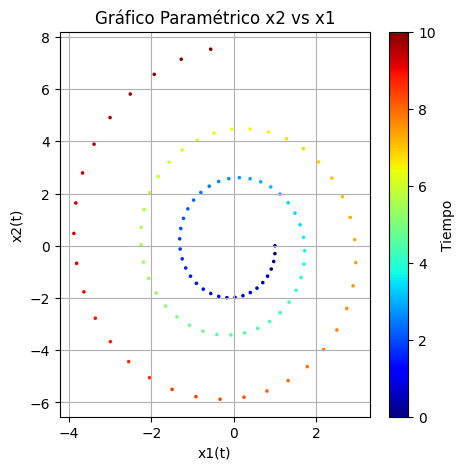

In [18]:
plt.figure(figsize=(5, 5))

# Gráfico paramétrico de x2 vs x1
plt.scatter(numerical_solution[:,0], numerical_solution[:,1], c=time_values, cmap='jet', marker='.', s=10.0)
plt.xlabel('x1(t)')
plt.ylabel('x2(t)')
plt.title('Gráfico Paramétrico x2 vs x1')
plt.colorbar(label='Tiempo')
plt.grid()
plt.show()

## **Ejercicio 7)** Integrador de **RK4**

El método de Runge-Kutta de orden 4 utiliza la teoría de diferencias finitas para calcular la siguiente aproximación de orden 4ta de un paso de integración

A saber
\begin{eqnarray}
x(t+h)
&=&
x(t)
+
\frac{h}{6}
(k_1+2k_2+2k_3+k_4)
+
\mathcal{O}(h^5)
\end{eqnarray}

donde

\begin{eqnarray}
k_1 &=& f(x,t) \\
k_2 &=& f(x+hk_1/2,t+h/2) \\
k_3 &=& f(x+hk_2/2,t+h/2) \\
k_4 &=& f(x+hk_3,t+h)
\end{eqnarray}

**1)** Implemente el método de RK4.

**2)** Repita el ejercicio **6)** pero usando **RK4** en vez de **Euler**.

**3)** Nota alguna diferencia al comparar la solución obtenida con Euler y la solución obtenida con RK4?

In [20]:
# 7.1)
'''
def rk4(f, x, start_time, end_time, step_size, alpha):
    def runge_kutta_4(f, x, t, h, *args):
        k1 = h * f(x, t, *args)
        k2 = h * f(x + k1 / 2, t + h / 2, *args)
        k3 = h * f(x + k2 / 2, t + h / 2, *args)
        k4 = h * f(x + k3, t + h, *args)
        return x + (k1 + 2*k2 + 2*k3 + k4) / 6

    # Definición de la función característica para el oscilador armónico
    def f(x, t, alpha):
        return np.array([x[1], -alpha * x[0]])

    # Solución numérica utilizando el método de RK4
    numerical_solution_rk4 = []
    t = start_time

    while t <= end_time:
        numerical_solution_rk4.append(x.copy())
        x = runge_kutta_4(f, x, t, step_size, alpha)
        t += step_size

    time_values = np.arange(start_time, end_time + step_size, step_size)
    numerical_solution_rk4 = np.array(numerical_solution_rk4)

    # Desempaquetamos las soluciones para x1 (y) y x2 (y')
    x1_values_rk4 = numerical_solution_rk4[:, 0]
    x2_values_rk4 = numerical_solution_rk4[:, 1]

    return time_values, x1_values_rk4, x2_values_rk4
'''
def rk4(f, x, t, step_size, parameters):
    def runge_kutta_4(f, x, t, h, *args):
        k1 = h * f(x, t, *args)
        k2 = h * f(x + k1 / 2, t + h / 2, *args)
        k3 = h * f(x + k2 / 2, t + h / 2, *args)
        k4 = h * f(x + k3, t + h, *args)
        return x + (k1 + 2*k2 + 2*k3 + k4) / 6

    # Solución numérica utilizando el método de RK4
    new_x = runge_kutta_4(f, x, t, step_size, parameters)

    return new_x

# Definición de la función característica para el oscilador armónico
def f(x, t, parameters):
    return np.array([x[1], -parameters[0] * x[0]])

# Definición de parámetros y condiciones iniciales
alpha = 3.0
initial_x = np.array([1.0, 0.0])  # Condiciones iniciales: x(a) = 1, x'(a) = 0
start_time = 0.0
end_time = 10.0
h = 0.1
num_steps = int((end_time - start_time) / h)
alpha = 3.0
parameters = [alpha]

time_values, x_values_rk4 = integrador_ode(rk4, f, initial_x, start_time, end_time, num_steps, parameters)

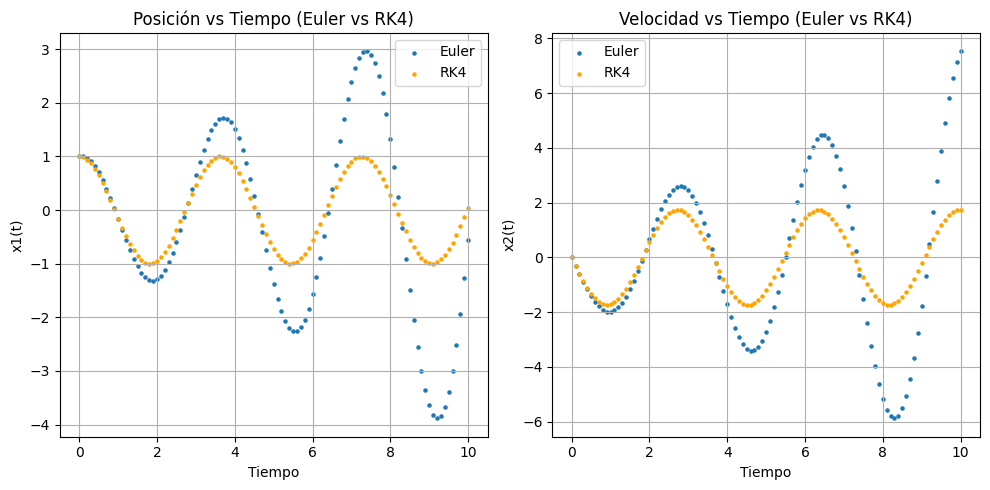

In [23]:
plt.figure(figsize=(10, 5))

# Gráfico de x1 vs t (RK4 vs Euler)
plt.subplot(1, 2, 1)
plt.scatter(time_values, numerical_solution[:,0], label='Euler', s=5.0)
plt.scatter(time_values, x_values_rk4[:,0], label='RK4', color='orange', s=5.0)
plt.xlabel('Tiempo')
plt.ylabel('x1(t)')
plt.title('Posición vs Tiempo (Euler vs RK4)')
plt.legend()
plt.grid()

# Gráfico de x2 vs t (RK4 vs Euler)
plt.subplot(1, 2, 2)
plt.scatter(time_values, numerical_solution[:,1], label='Euler', s=5.0)
plt.scatter(time_values, x_values_rk4[:,1], label='RK4', color='orange', s=5.0)
plt.xlabel('Tiempo')
plt.ylabel('x2(t)')
plt.title('Velocidad vs Tiempo (Euler vs RK4)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

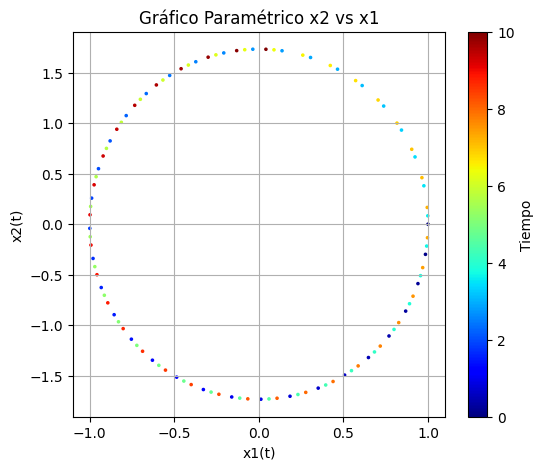

In [28]:
plt.figure(figsize=(6, 5))

# Gráfico paramétrico de x2 vs x1
plt.scatter(x_values_rk4[:,0], x_values_rk4[:,1], c=time_values, cmap='jet', marker='.', s=10.0)
plt.xlabel('x1(t)')
plt.ylabel('x2(t)')
plt.title('Gráfico Paramétrico x2 vs x1')
plt.colorbar(label='Tiempo')
plt.grid()
plt.show()

En la comparación gráfica, se puede notar que las soluciones obtenidas utilizando RK4 son más precisas y se mantienen más cerca de la solución analítica que las soluciones obtenidas con el método de Euler. El método RK4 es conocido por su mayor precisión y estabilidad en comparación con el método de Euler, especialmente para sistemas más sensibles a pequeñas variaciones en las condiciones iniciales o en los parámetros.

## **Ejercicio 8)** Creando una "libreria" de integradores ODE

**1)** Exporte el actual notebook `redes-neuronales-2022-practico-4.ipynb` a `ode.py`.

**2)** Con su editor de texto favorito, elimine todo lo que sobra de `ode.py`. Deje, solamente, el código que:

* importa `numpy`.

* define la funcion `euler`.

* define la funcion `rk4`.

* define la funcion `integrador_ode`.

**3)** En google colab, suba el archiv `ode.py` anteriormente credo.

**4)** Importe la "libreria" `ode` escribiendo

    import ode

**5)** Pruebe la libreria `ode` escribiendo

    t,x = ode.integrador_ode(ode.rk4,f,xa,a,b,k,p)

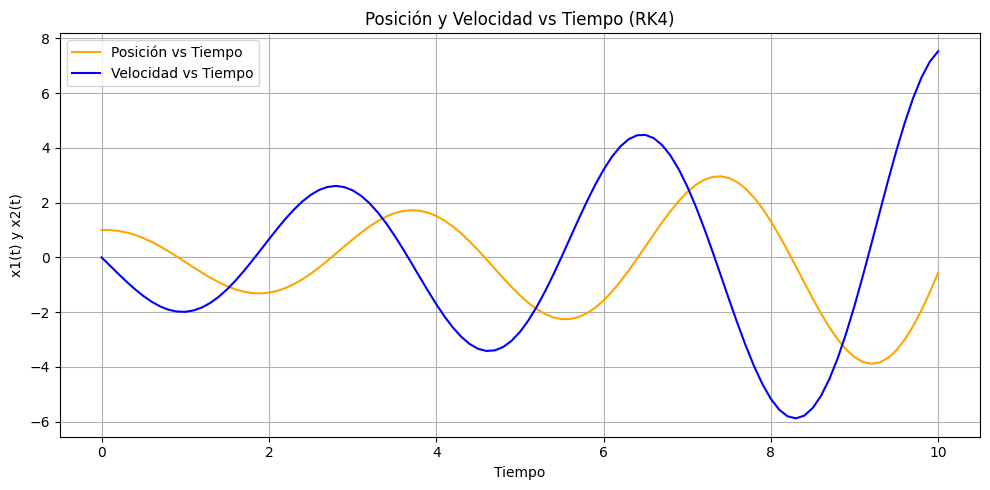

In [29]:
# 8.4)
import numpy as np
import ode
import matplotlib.pyplot as plt

# Definición de parámetros y condiciones iniciales
initial_x = np.array([1.0, 0.0])  # Condiciones iniciales: x(a) = 1, x'(a) = 0
start_time = 0.0
end_time = 10.0
h = 0.1
num_steps = int((end_time - start_time) / h)
alpha = 3.0
parameters = [alpha]

# Definición de la función característica para el oscilador armónico
def f(x, t, parameters):
    return np.array([x[1], -parameters[0] * x[0]])

t, x = ode.integrador_ode(ode.euler, f, initial_x, start_time, end_time, num_steps, parameters) #params: m, f, x0, a, b, k, p, c=None

plt.figure(figsize=(10, 5))

# Gráfico de x1 y x2 vs t 
plt.plot(t, x[:,0], color='orange', label='Posición vs Tiempo')
plt.plot(t, x[:,1], color='blue', label='Velocidad vs Tiempo')
plt.xlabel('Tiempo')
plt.ylabel('x1(t) y x2(t)')
plt.title('Posición y Velocidad vs Tiempo (RK4)')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
